In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [5]:
df = pd.read_csv('/Users/darinaafanaseva/Desktop/DataScience/project/data/_data.csv')

In [6]:
pd.set_option('display.max_columns', None)

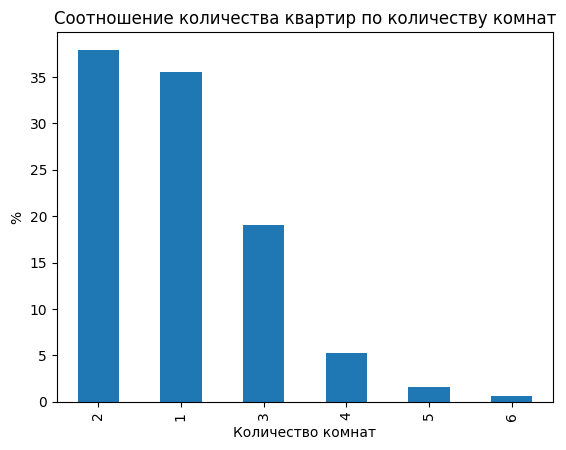

In [7]:
# Количество комнат

rooms = df[['Количество комнат']].dropna()
rooms_qty = rooms['Количество комнат']
rooms_qty = rooms_qty.apply(lambda x: x.split(',')[0])
total = rooms_qty.count()
value_counts = rooms_qty.value_counts()
percentages = (value_counts / total) * 100
percentages.plot(kind='bar')
plt.xlabel('Количество комнат')
plt.xticks(rotation=90)
plt.ylabel('%')
plt.title('Соотношение количества квартир по количеству комнат')
plt.show()

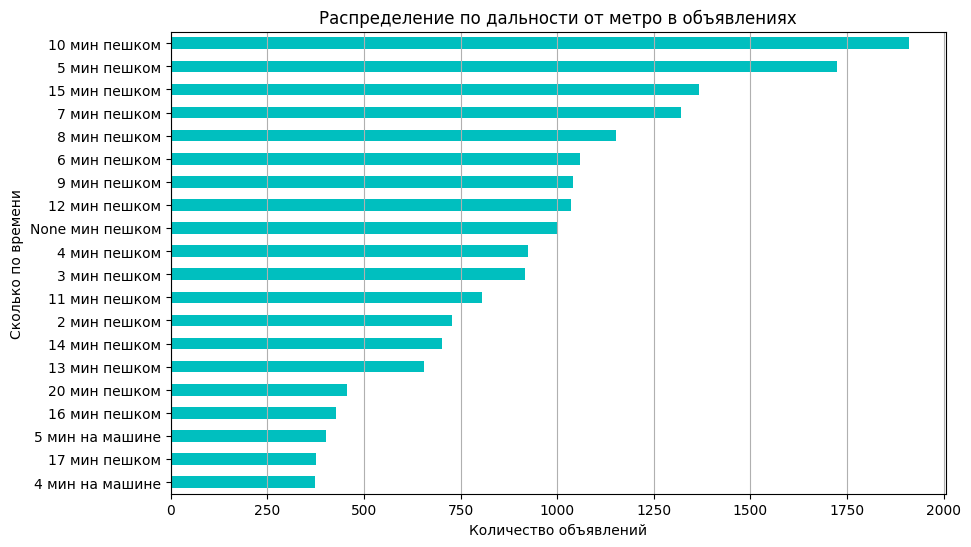

In [8]:
df['Road_to_metro'] = df['Метро'].str.extract(r'\(([^)]+)')

Road_to_metro_counts = df['Road_to_metro'].value_counts().head(20)
plt.figure(figsize=(10, 6))
Road_to_metro_counts.plot(kind='barh', color='c')
plt.title('Распределение по дальности от метро в объявлениях')
plt.xlabel('Количество объявлений')
plt.ylabel('Сколько по времени')
plt.grid(axis='x')
plt.gca().invert_yaxis()
plt.show()

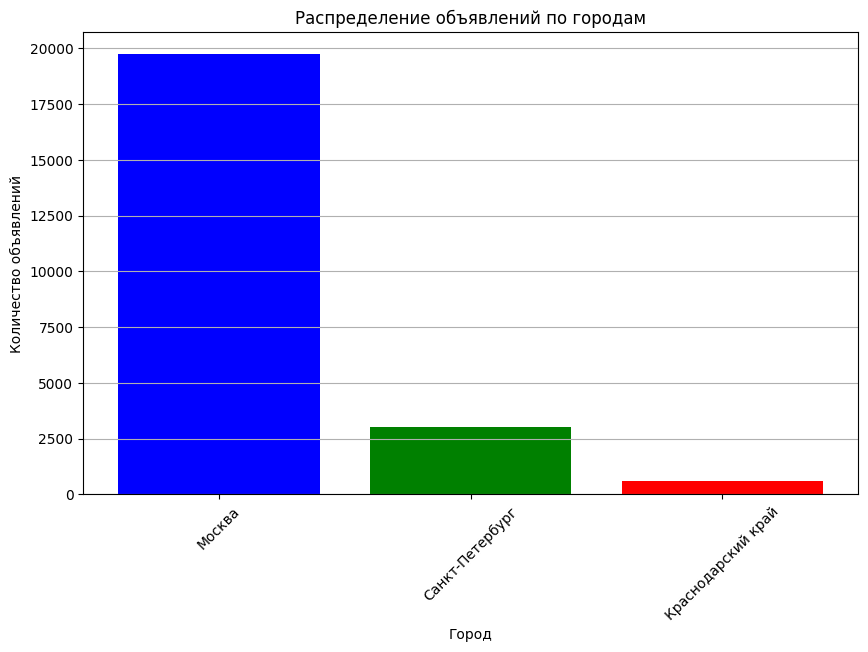

In [9]:
# Объявления из каких городов представлены
df['Город'] = df['Адрес'].apply(lambda x: x.split(",")[0].strip())
cities_count = df['Город'].value_counts()

unique_cities_count = df['Город'].nunique()

cities = cities_count.index
counts = cities_count.values

plt.figure(figsize=(10, 6))
plt.bar(cities, counts, color=['blue', 'green', 'red'])
plt.title('Распределение объявлений по городам')
plt.xlabel('Город')
plt.ylabel('Количество объявлений')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [10]:
# Топ 10 адресов по количеству объявлений

ads_by_address = df.groupby('Адрес')['ID  объявления'].count().reset_index(name='Количество объявлений')
ads_by_address_sorted = ads_by_address.sort_values(by='Количество объявлений', ascending=False)
ads_by_address_sorted.head(10)


,Адрес,Количество объявлений
6934,"Москва, Чапаевский переулок, 3",63
8551,"Москва, улица Василисы Кожиной, 13",46
7961,"Москва, улица 1-я Леонова, 18",42
4365,"Москва, Мосфильмовская улица, 8",37
2274,"Москва, Гостиничный проезд, 8К1",32
10796,"Москва, шоссе Энтузиастов, 3к1",31
7962,"Москва, улица 1-я Машиностроения, 10",30
397,"Москва, 1-й Красногвардейский проезд, 22с2",28
10337,"Москва, улица Серафимовича, 2",28
8387,"Москва, улица Берзарина, 30А",28


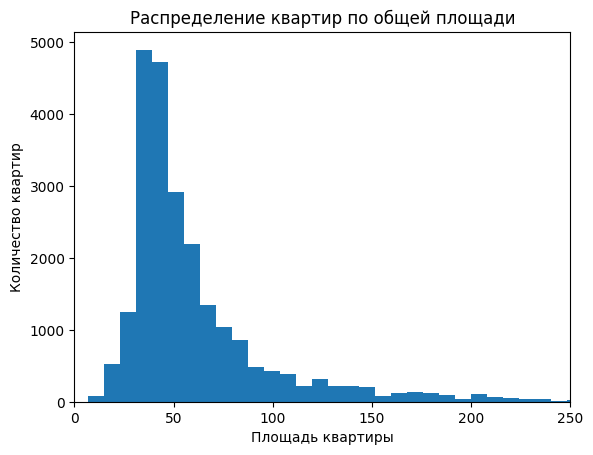

In [11]:
# Площадь

area = df['Площадь, м2']
total_area = area.apply(lambda x: x.split('/')[0])
total_area = total_area.astype(float)
plt.hist(total_area, bins=100)
plt.xlabel('Площадь квартиры')
plt.ylabel('Количество квартир')
plt.xlim(0, 250)
plt.title('Распределение квартир по общей площади')
plt.show()

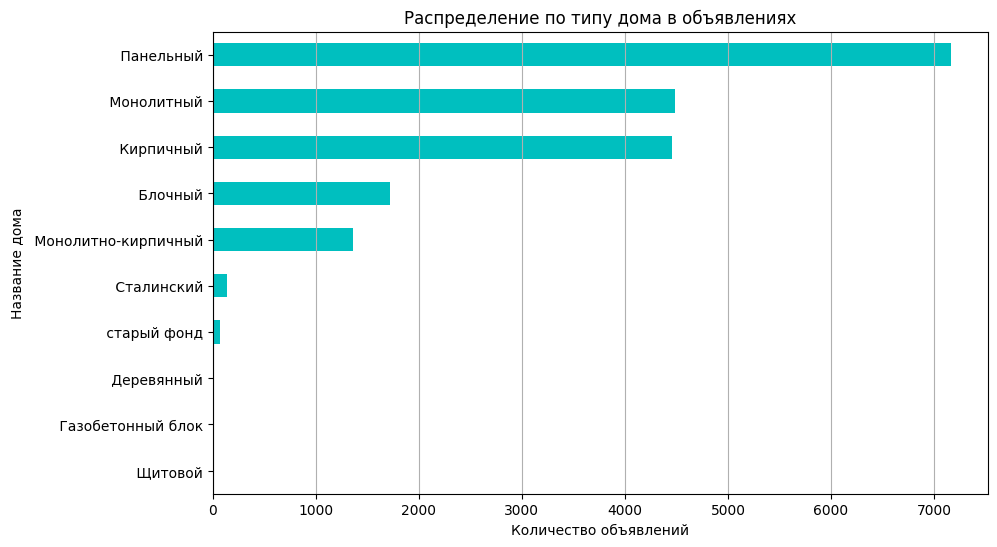

In [12]:
# Типы домов
df[['Floor', 'House']] = df['Дом'].str.split(',', expand=True)
df[['Floor_flat', 'Floor_all']] = df['Floor'].str.split('/', expand=True)

House_counts = df['House'].value_counts()
plt.figure(figsize=(10, 6))
House_counts.plot(kind='barh', color='c')
plt.title('Распределение по типу дома в объявлениях')
plt.xlabel('Количество объявлений')
plt.ylabel('Название дома')
plt.grid(axis='x')
plt.gca().invert_yaxis()
plt.show()

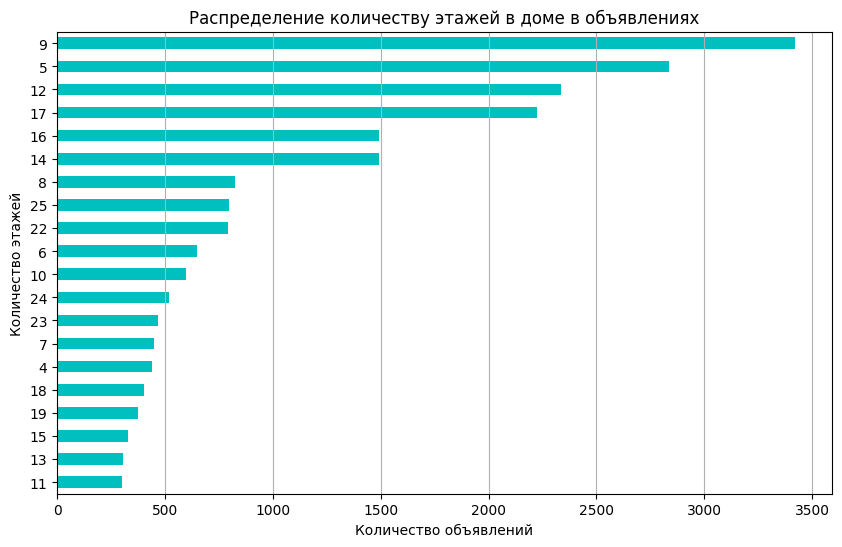

In [13]:
# Количество этажей в доме
Floor_all_counts = df['Floor_all'].value_counts().head(20)
plt.figure(figsize=(10, 6))
Floor_all_counts.plot(kind='barh', color='c')
plt.title('Распределение количеству этажей в доме в объявлениях')
plt.xlabel('Количество объявлений')
plt.ylabel('Количество этажей')
plt.grid(axis='x')
plt.gca().invert_yaxis()
plt.show()

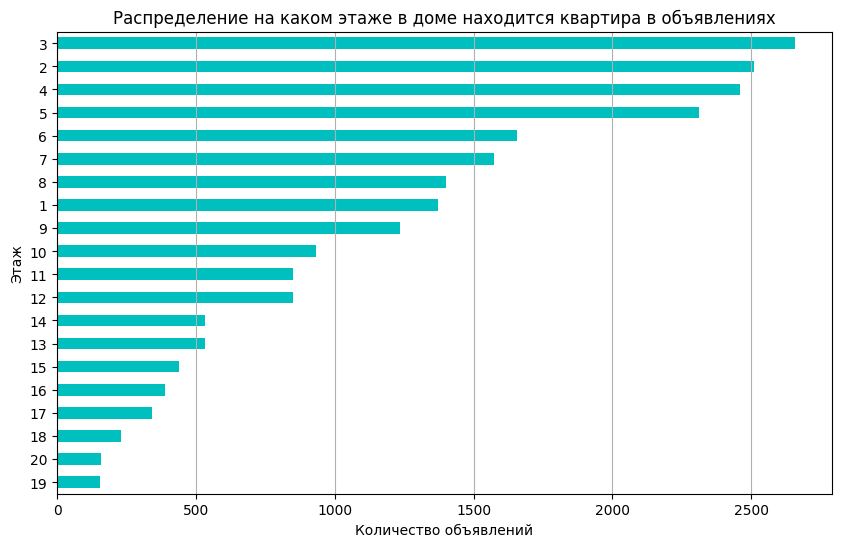

In [14]:
# Этаж квартиры

Floor_flat_counts = df['Floor_flat'].value_counts().head(20)
plt.figure(figsize=(10, 6))
Floor_flat_counts.plot(kind='barh', color='c')
plt.title('Распределение на каком этаже в доме находится квартира в объявлениях')
plt.xlabel('Количество объявлений')
plt.ylabel('Этаж')
plt.grid(axis='x')
plt.gca().invert_yaxis()
plt.show()

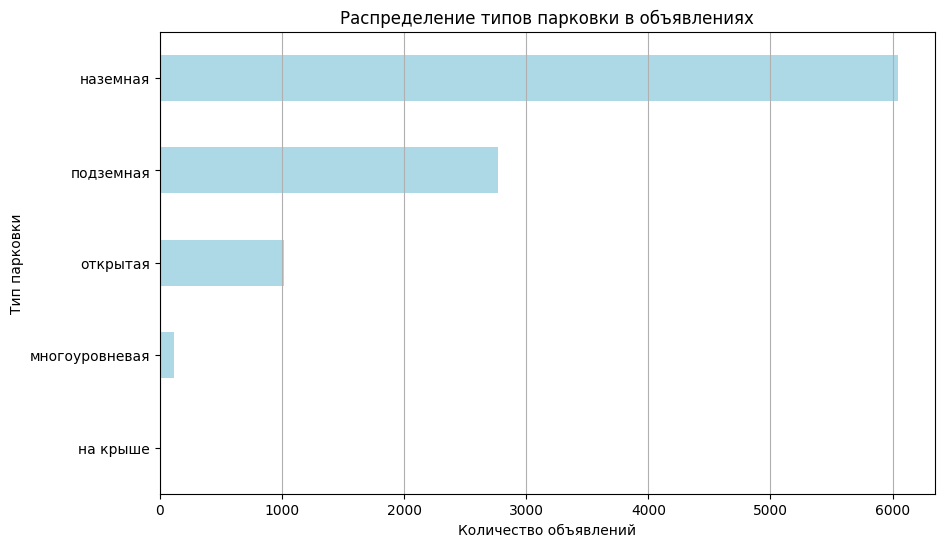

Парковка
наземная          6043
подземная         2772
открытая          1017
многоуровневая     118
на крыше             1
Name: count, dtype: int64

In [32]:
# Варианты парковки

parking_counts = df['Парковка'].value_counts()

plt.figure(figsize=(10, 6))
parking_counts.plot(kind='barh', color='lightblue')
plt.title('Распределение типов парковки в объявлениях')
plt.xlabel('Количество объявлений')
plt.ylabel('Тип парковки')
plt.grid(axis='x')
plt.gca().invert_yaxis()
plt.show()
parking_counts



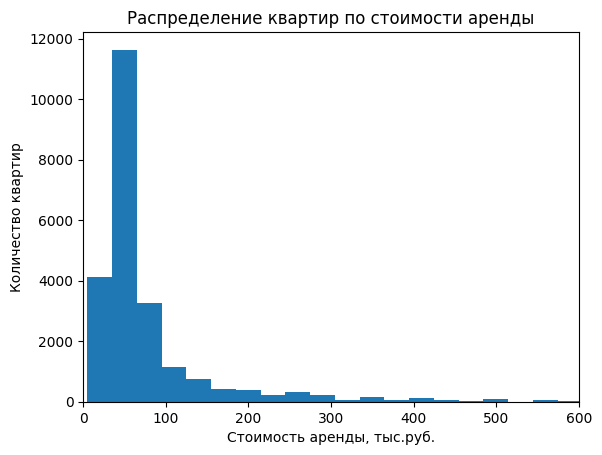

In [16]:
price = df['Цена'].dropna()
rent_price = price.apply(lambda x: x.split('/')[0])
rent_price_rub = rent_price.apply(lambda x: float(x.split(' ')[0])/1000)

plt.hist(rent_price_rub, bins=100)
plt.xlabel('Cтоимость аренды, тыс.руб.')
plt.ylabel('Количество квартир')
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0, 600)
plt.title('Распределение квартир по стоимости аренды')
plt.show()

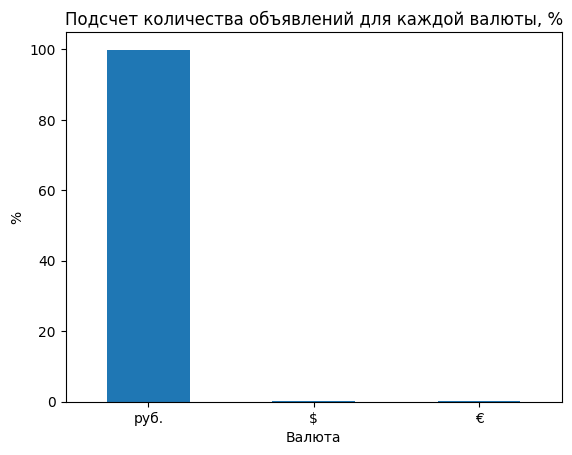

In [17]:
price = df['Цена'].dropna()
rent_price = price.apply(lambda x: x.split('/')[0])
rent_price_currency = rent_price.apply(lambda x: x.split(' ')[1])
value_counts = rent_price_currency.value_counts()
total = value_counts.sum()
percentages = (value_counts / total) * 100
percentages.plot(kind='bar')
plt.xlabel('Валюта')
plt.xticks(rotation=0)
plt.ylabel('%')
plt.title('Подсчет количества объявлений для каждой валюты, %')
plt.show()

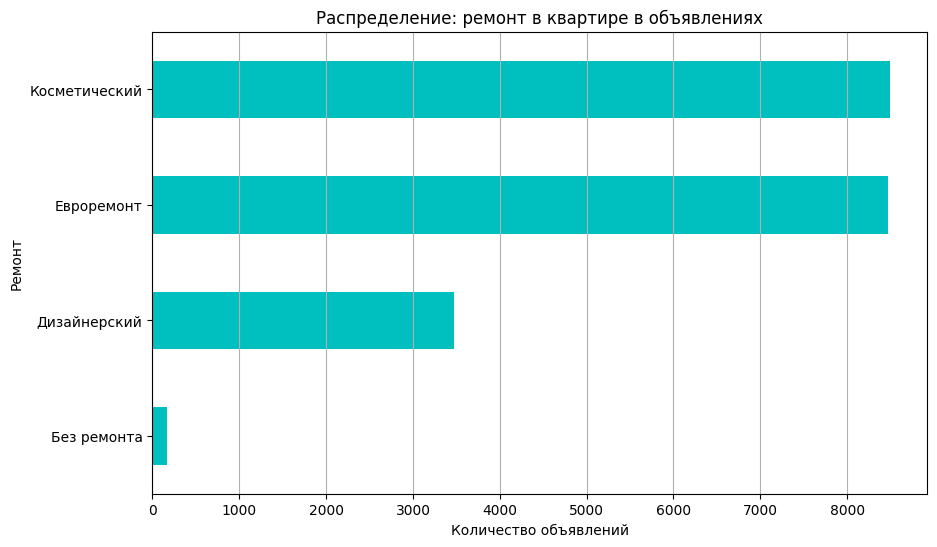

In [18]:
df.rename(columns = {'Ремонт':'Repair'}, inplace = True )

Repair_counts = df['Repair'].value_counts()
plt.figure(figsize=(10, 6))
Repair_counts.plot(kind='barh', color='c')
plt.title('Распределение: ремонт в квартире в объявлениях')
plt.xlabel('Количество объявлений')
plt.ylabel('Ремонт')
plt.grid(axis='x')
plt.gca().invert_yaxis()
plt.show()

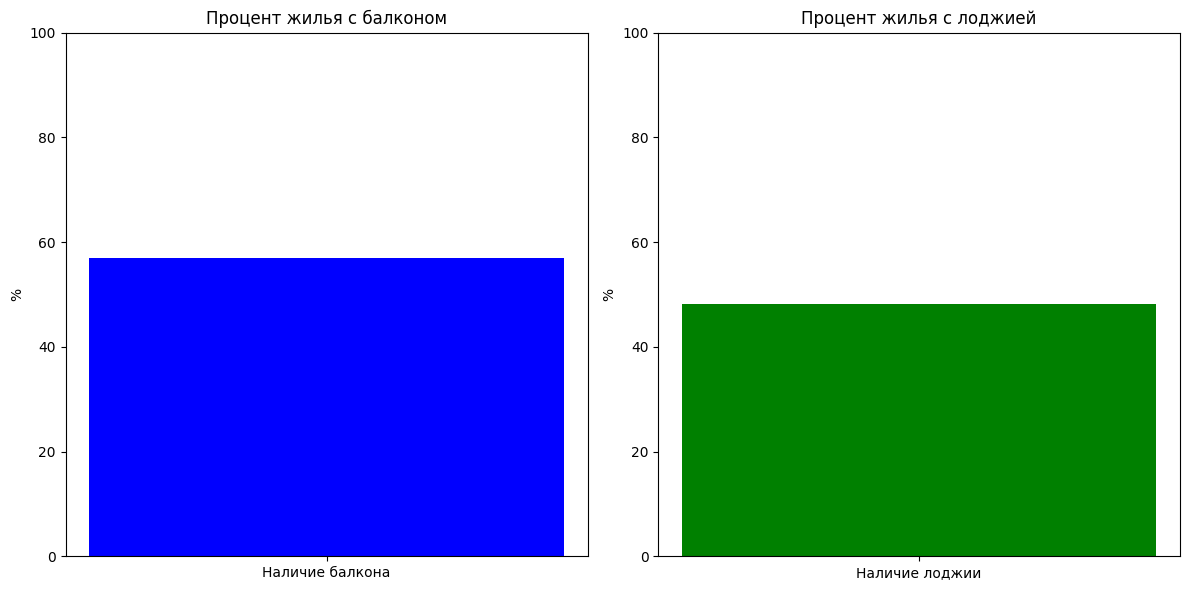

In [20]:
# Балконы и лоджии
balconies_only = df['Балкон'].str.contains('Лоджия')
total = balconies_only.count()
num_balconies = balconies_only.sum()
percentage_with_loggias = (num_balconies / total) * 100

balconies_only = df['Балкон'].str.contains('Балкон')
total = balconies_only.count()
num_balconies = balconies_only.sum()
percentage_with_balconies = (num_balconies / total) * 100

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axs[0].bar(['Наличие балкона'], [percentage_with_balconies], width=0.5, color='blue')
axs[0].set_ylim(0, 100)
axs[0].set_ylabel('%')
axs[0].set_title('Процент жилья с балконом')
axs[1].bar(['Наличие лоджии'], [percentage_with_loggias], width=0.5, color='green')
axs[1].set_ylim(0, 100)
axs[1].set_ylabel('%')
axs[1].set_title('Процент жилья с лоджией')
plt.tight_layout()
plt.show()

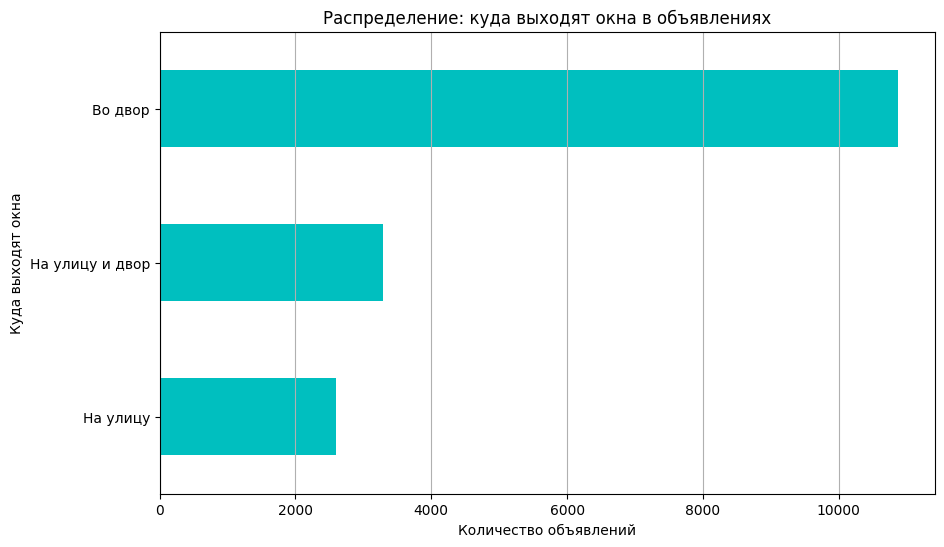

In [33]:
# Окна

df.rename(columns = {'Окна':'Windows'}, inplace = True )

Windows_counts = df['Windows'].value_counts()
plt.figure(figsize=(10, 6))
Windows_counts.plot(kind='barh', color='c')
plt.title('Распределение: куда выходят окна в объявлениях')
plt.xlabel('Количество объявлений')
plt.ylabel('Куда выходят окна')
plt.grid(axis='x')
plt.gca().invert_yaxis()
plt.show()

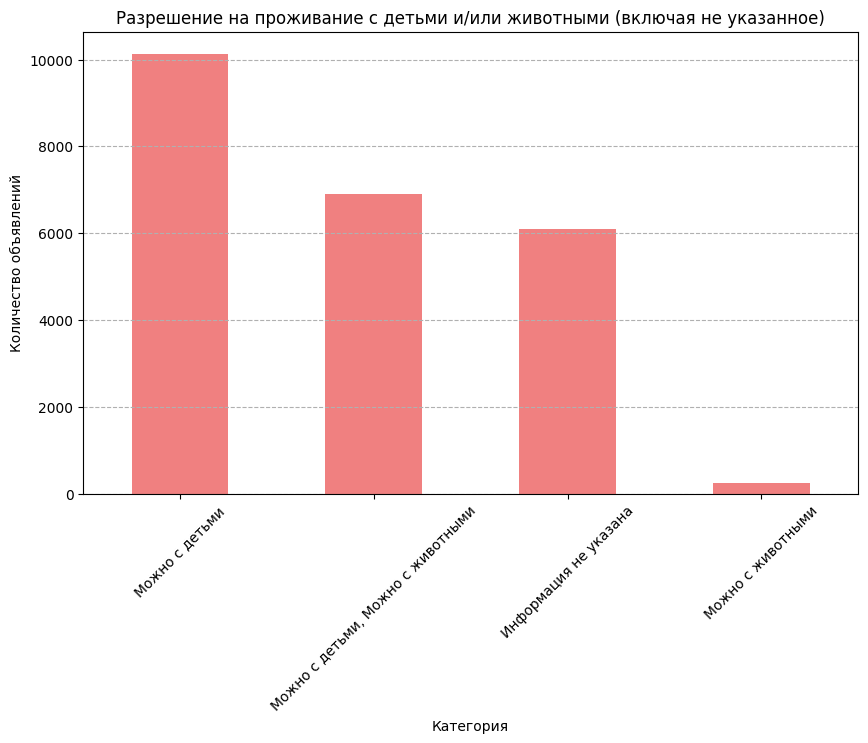

In [24]:
# Можно с детьми/с животными

category_counts_including_na = df['Можно с детьми/животными'].value_counts(dropna=False)
category_counts_including_na.index = category_counts_including_na.index.fillna('Информация не указана')

plt.figure(figsize=(10, 6))
category_counts_including_na.plot(kind='bar', color='lightcoral')
plt.title('Разрешение на проживание с детьми и/или животными (включая не указанное)')
plt.xlabel('Категория')
plt.ylabel('Количество объявлений')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

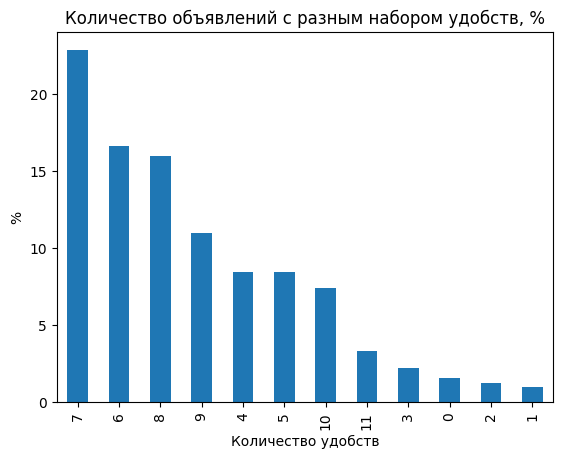

In [25]:
# Дополнительно

df['Количество удобств'] = df['Дополнительно'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)
comfort = df[['ID  объявления', 'Количество удобств']]
value_counts = df['Количество удобств'].value_counts()
total = value_counts.sum()
percentages = (value_counts / total) * 100
percentages.plot(kind='bar')
plt.xlabel('Количество удобств')
plt.xticks(rotation=90)
plt.ylabel('%')
plt.title('Количество объявлений с разным набором удобств, %')
plt.show()

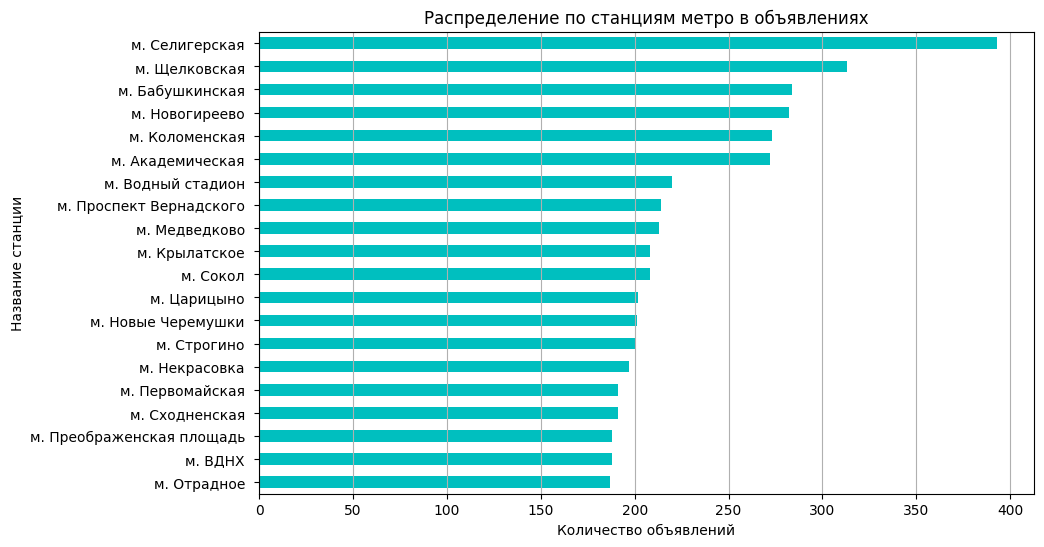

In [26]:
# метро

df['Metro'] = df['Метро'].str.replace(r'\([^)]*\)', '', regex=True)

metro_counts = df['Metro'].value_counts().head(20)
plt.figure(figsize=(10, 6))
metro_counts.plot(kind='barh', color='c')
plt.title('Распределение по станциям метро в объявлениях')
plt.xlabel('Количество объявлений')
plt.ylabel('Название станции')
plt.grid(axis='x')
plt.gca().invert_yaxis()
plt.show()



In [27]:
# Названия жк (ЭТО НАМ НЕ НУЖНО)

# zk = df['Название ЖК'].dropna()

# zk = zk.apply(lambda x: x.split(',')[0])
# value_counts = zk.value_counts()
# value_counts_displayed = value_counts[:50]
# total = value_counts.sum()
# percentages = (value_counts_displayed / total) * 100
# percentages.plot(kind='bar')
# plt.xlabel('Названия жк')
# plt.xticks(rotation=90)
# plt.ylabel('%')
# plt.title('ЖК')
# plt.show()

In [28]:
# Серия дома

# df.rename(columns = {'Серия дома':'House_series'}, inplace = True )
# df['House_series'].value_counts()

In [29]:
# Высота потолков
df['Высота потолков, м'] = pd.to_numeric(df['Высота потолков, м'], errors='coerce')

potolok_stats = df['Высота потолков, м'].describe()
print(potolok_stats) 

count    11206.00000
mean         2.98345
std          7.61472
min          1.20000
25%          2.64000
50%          2.64000
75%          2.80000
max        320.00000
Name: Высота потолков, м, dtype: float64


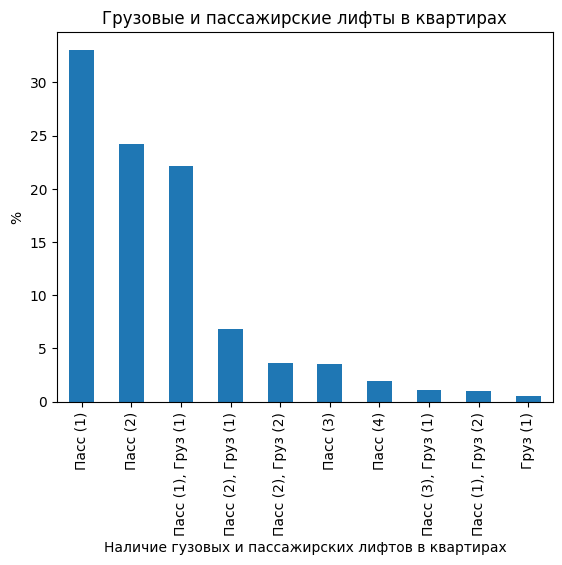

In [30]:
# Лифты

lift = df['Лифт'].dropna()
value_counts = lift.value_counts()
value_counts_displayed = value_counts[:10]
total = value_counts.sum()
percentages = (value_counts_displayed / total) * 100
percentages.plot(kind='bar')
plt.xlabel('Наличие гузовых и пассажирских лифтов в квартирах')
plt.xticks(rotation=90)
plt.ylabel('%')
plt.title('Грузовые и пассажирские лифты в квартирах')
plt.show()

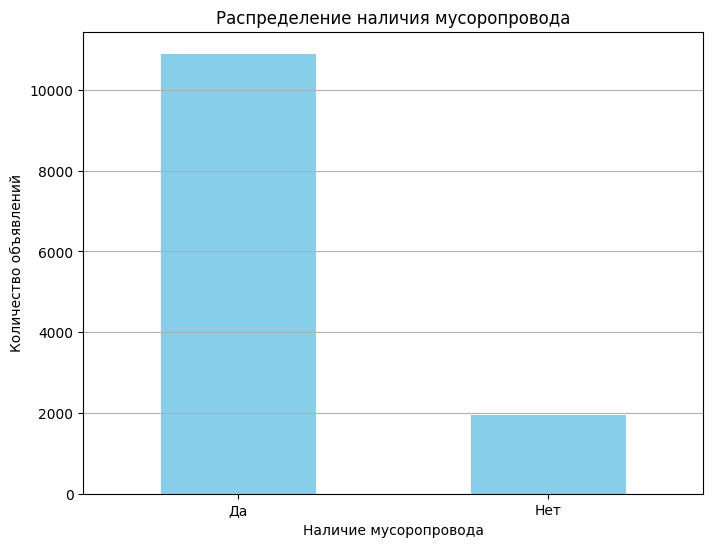

In [31]:
# Мусоропровод

df.rename(columns = {'Мусоропровод':'Garbage_chute'}, inplace = True )
garbage_counts = df['Garbage_chute'].value_counts()

plt.figure(figsize=(8, 6))
garbage_counts.plot(kind='bar', color='skyblue')
plt.title('Распределение наличия мусоропровода')
plt.xlabel('Наличие мусоропровода')
plt.ylabel('Количество объявлений')
plt.xticks(rotation=0)
plt.grid(axis='y')  
plt.show()